# Posets in Sage - An Introduction

## Math 737 - Lab 1

## First define a poset.

### Make a list of the elements of your poset, then a list of the covering relations between poset element.

### Evaluate the cell below by putting your cursor in the block and then pressing shift + enter

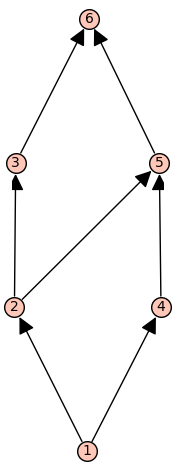

In [3]:
elem = [1,2,3,4,5,6]
rels = [[1,2],[2,3],[4,5],[5,6],[1,4],[2,5],[3,6]]
Q = Poset((elem,rels))
Q.plot()

## You can also make a random poset.

### Evaluate the cell below multiple times to see multiple random posets of 7 elements.

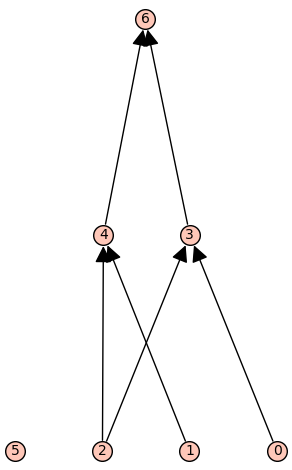

In [4]:
myposet = Posets(7).random_element()
plot(myposet)

### Exercise 1: Make some of the example posets P, Q, R, S, T, N, from our last class. We already made Q above.

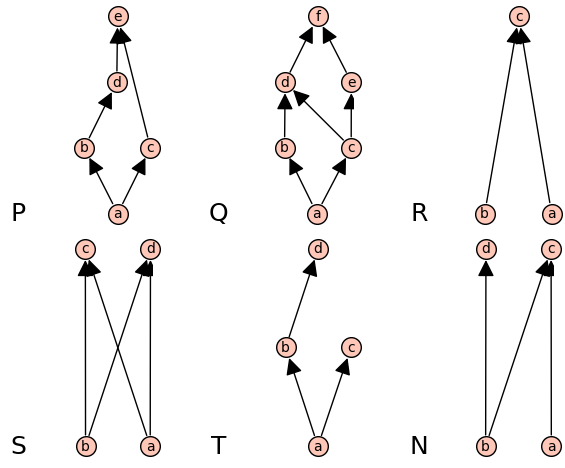

In [5]:
# P
elem = ['a','b','c','d','e']
rels = [['a','b'],['b','d'],['d','e'],['a','c'],['c','e']]
P = Poset((elem,rels))
P.plot()

# Q
elem = ['a','b','c','d','e']
rels = [['a','b'],['a','c'],['b','d'],['c','d'],['c','e'],['d','f'],['e','f']]
Q = Poset((elem,rels))
Q.plot()

# R
elem = ['a','b','c']
rels = [['a','c'],['b','c']]
R = Poset((elem,rels))
R.plot()

# S
elem = ['a','b','c','d']
rels = [['a','c'],['a','d'],['b','c'],['b','d']]
S = Poset((elem,rels))
S.plot()

# T
elem = ['a','b','c','d']
rels = [['a','b'],['b','d'],['a','c']]
T = Poset((elem,rels))
T.plot()

# N
elem = ['a','b','c','d']
rels = [['a','c'],['b','c'],['b','d']]
N = Poset((elem,rels))
N.plot()


def L(X, name):
    g = X.plot(axes=False, figsize=4)
    return g + text(name, (0,0), fontsize=18, color='black')

graphics_array([
    [L(P,"P"), L(Q,"Q"), L(R,"R")],
    [L(S,"S"), L(T,"T"), L(N,"N")]
]).show()



### Exercise 2: Use Sage to verify your answers from yesterday's class. You may need to access the documentation to see what the function is actually doing.

In [6]:

# Disjoint sum (disjoint union) of T and R
PdQ = Q.disjoint_union(P)
# Ordinal sum of P and Q
PoQ = P.ordinal_sum(Q)
# Cartesion product of P and Q
PxQ = P.product(Q)
# Ordinal Product of P and Q
PoxQ = P.ordinal_product(Q)

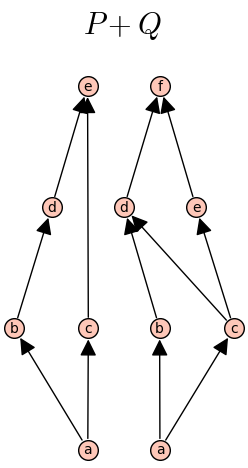

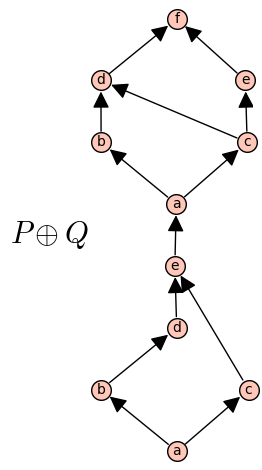

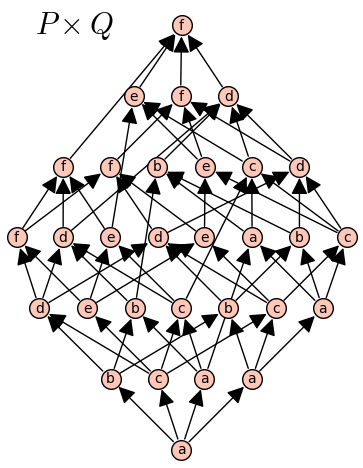

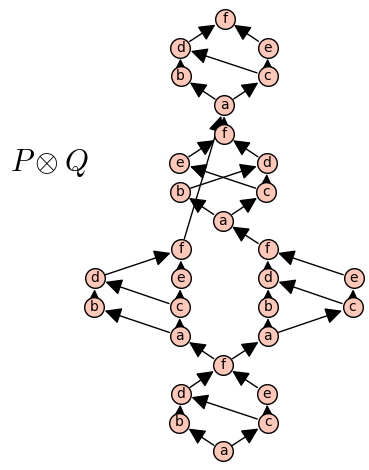

In [7]:

g1 = PdQ.plot(
    axes=False,
    element_labels={v: v[1] for v in PdQ}
)

g2 = PoQ.plot(
    axes=False,
    element_labels={v: v[1] for v in PoQ}
)

g3 = PxQ.plot(
    axes=False,
    element_labels={v: v[1] for v in PxQ}
)

g4 = PoxQ.plot(
    axes=False,
    element_labels={v: v[1] for v in PoxQ}
)


h = PoQ.height() # This is a constant to scale things
g1.set_axes_range(-h, h, -1, h + 0.5) 

(g1 + text(r"$P + Q$", (1.5, 3.5),
          fontsize=22, color='black',
          horizontal_alignment='center')).show()
(g2 + text(r"$P \oplus Q$", (1.5, 3.5),
          fontsize=22, color='black',
          horizontal_alignment='center')).show()
(g3 + text(r"$P \times Q$", (1.5, 6),
          fontsize=22, color='black',
          horizontal_alignment='center')).show()
(g4 + text(r"$P \otimes Q$", (1.5, 10),
          fontsize=22, color='black',
          horizontal_alignment='center')).show()

### The following function is code for the rank generating function of a poset P. It will not work if your poset does not have a rank function.
#### Evaluate the cell to define the function and then use it to find the rank generating functions of our example posets.

In [8]:
def rank_generating_function(P):
    if not P.is_ranked():
        return "Does not exist, poset is not ranked"
    f = P.rank_function()
    rk = P.rank()
    list_of_ranks = [f(i) for i in P]
    R.<x> = PolynomialRing(QQ)
    rgf = 0
    for elem in list_of_ranks:
        rgf += x^elem
    return rgf

# Poset dictionary
posets = {
    "P": P,
    "Q": Q,
    "R": R,
    "S": S,
    "T": T,
    "N": N
}

for key,poset in posets.items():
    print(f"Rank generating function of {key}: {rank_generating_function(poset)}")

Rank generating function of P: Does not exist, poset is not ranked
Rank generating function of Q: x^3 + 2*x^2 + 2*x + 1
Rank generating function of R: x + 2
Rank generating function of S: 2*x + 2
Rank generating function of T: x^2 + 2*x + 1
Rank generating function of N: 2*x + 2


### An order ideal is a subset of poset elements that is closed downward.

#### Let's make a random order ideal, using the code below. The green elements are the order ideal. The red elements are an order filter.

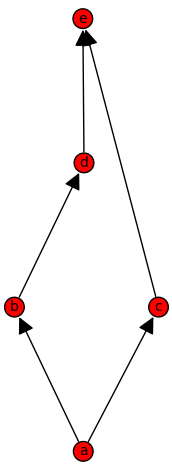

In [9]:
oi = P.random_order_ideal()
list(oi)
P.order_ideal_plot(oi)

## Here is one of my favorite posets: the triangle

In [10]:
elemP7 = [11, 12, 13, 14, 15, 16, 17, 21, 22, 23, 24, 25, 26, 31, 32, 33, 34, 35, 41, 42, 43, 44, 51, 52, 53, 61, 62, 71]
relP7 = [[11,21],[12, 21],[12, 22],[13, 22],[13, 23],[14, 23],[14, 24],[15,24],[15,25],[16,25],[16,26],[17,26],[21,31],[22,31],[22,32],[23,32],[23,33],[24,33],[24,34],[25,34],[25,35],[26,35],[31,41],[32,41],[32,42],[33,42],[33,43],[34,43],[34,44],[35,44],[41,51],[42,51],[42,52],[43,52],[43,53],[44,53],[51,61],[52,61],[52,62],[52,62],[53,62],[61,71],[62,71]]
P7 = Poset((elemP7,relP7))

## Evaluate the following cells to see some ways to plot posets

### The normal way

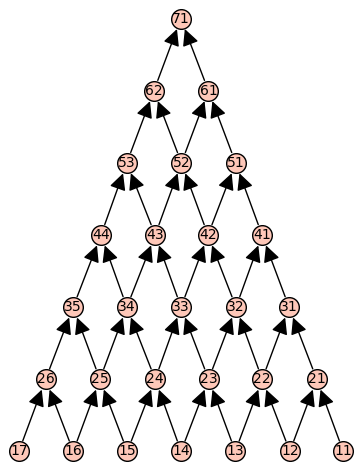

In [11]:
plot(P7)

### The pretty way

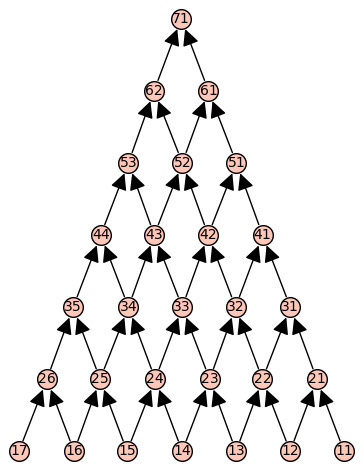

In [12]:
show(P7.plot())

### Latex code for putting in your paper

In [13]:
latex(P7)


This package is required to render graphs in LaTeX.
Visit '...'.


This package is required to render graphs in LaTeX.
Visit 'https://www.ctan.org/pkg/tkz-graph'.


This package is required to render graphs in LaTeX.
Visit 'https://www.ctan.org/pkg/tkz-berge'.



\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.0,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{0.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.0,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{0.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.0,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{0.0,0.0,0.0}
\definecolor{cv3}{rgb}{0.0,0.0,0.0}
\definecolor{cfv3}{rgb}{1.0,1.0,1.0}
\definecolor{clv3}{rgb}{0.0,0.0,0.0}
\definecolor{cv4}{rgb}{0.0,0.0,0.0}
\definecolor{cfv4}{rgb}{1.0,1.0,1.0}
\definecolor{clv4}{rgb}{0.0,0.0,0.0}
\definecolor{cv5}{rgb}{0.0,0.0,0.0}
\definecolor{cfv5}{rgb}{1.0,1.0,1.0}
\definecolor{clv5}{rgb}{0.0,0.0,0.0}
\definecolor{cv6}{rgb}{0.0,0.0,0.0}
\definecolor{cfv6}{rgb}{1.0,1.0,1.0}
\definecolor{clv6}{rgb}{0.0,0.0,0.0}
\definecolor{cv7}{rgb}{0.0,0.0,0.0}
\definecolor{cfv7}{rgb}{1.0,1.0,1.0}
\definecolor{clv7}{rgb}{0.0,0.0,0.0}
\definecolor{cv8}{rgb}{0.0,0.0,0.0}
\definecolor{cfv8}{rgb}{1.0,1.0,1.0}
\definecolor{clv8}{rgb}{0.0

### The boingy way

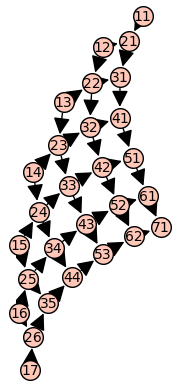

In [14]:
H7 = P7.hasse_diagram()
show(H7)

### The sticky way

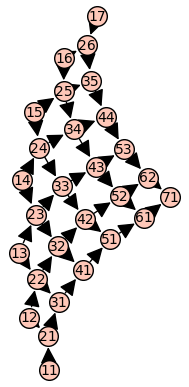

In [15]:
H7.plot(save_pos=True)
show(H7)

### Exercise 3: Use these various plot methods on our example posets. Which plot method is your favorite?

In [16]:
I like boingy

SyntaxError: invalid syntax (4179849638.py, line 1)

### The reason the triangle poset is one of my favorite posets is that order ideals of the triangle poset are Dyck paths!

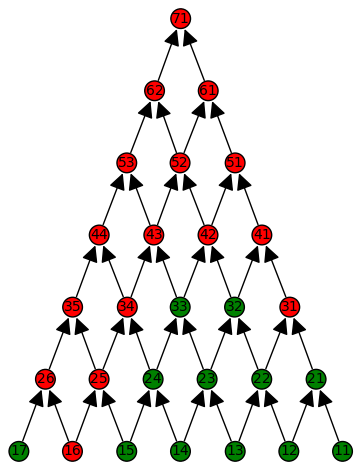

In [ ]:
P7oi = P7.random_order_ideal()
P7.order_ideal_plot(P7oi)

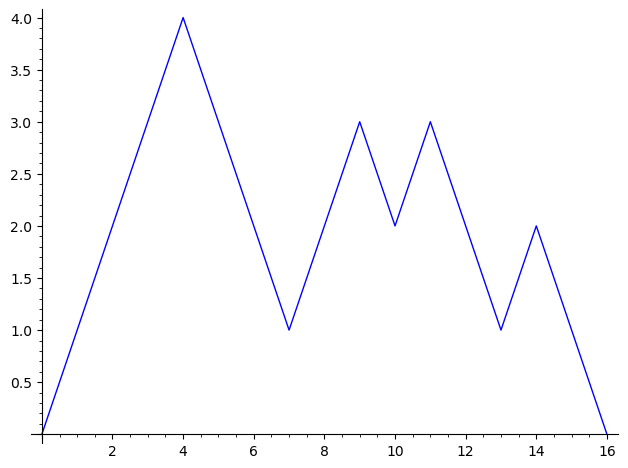

In [ ]:
d = DyckWords(8).random_element()
plot(d)

## We can use Sage to construct new posets from old

### Exercise 4: Using our example posets P,Q,R,S,T,N, construct new posets as examples of the disjoint sum, ordinal sum, and direct (cartesian) product. Plot the new posets you create.

In [17]:
# Poset dictionary
PO = {
    "P": P,
    "Q": Q,
    "R": R,
    "S": S,
    "T": T,
    "N": N
}

""" 
examples of poset operations:

# Disjoint sum (disjoint union) of T and R
PdQ = Q.disjoint_union(P)
# Ordinal sum of P and Q
PoQ = P.ordinal_sum(Q)
# Cartesion product of P and Q
PxQ = P.product(Q)
# Ordinal Product of P and Q
PoxQ = P.ordinal_product(Q)
"""

# New Posets (Some old drawings you made)
RdT = R.disjoint_union(T)
RoN = R.ordinal_sum(N)
NxR = N.product(R)
NoxR = N.ordinal_product(R)


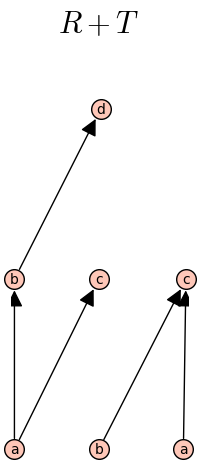

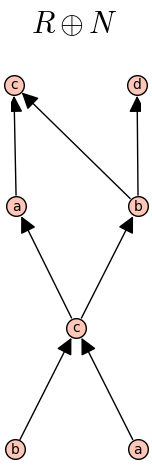

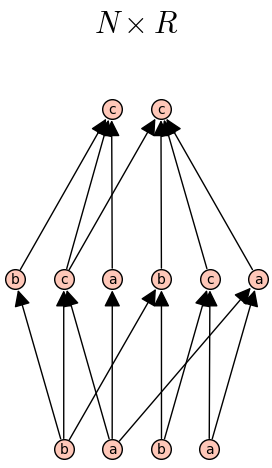

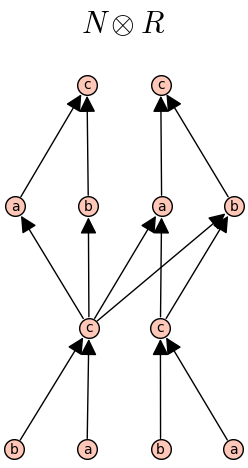

In [18]:

g1 = RdT.plot(
    axes=False,
    element_labels={v: v[1] for v in RdT}
)

g2 = RoN.plot(
    axes=False,
        element_labels={v: v[1] for v in RoN}
)

g3 = NxR.plot(
    axes=False,
    element_labels={v: v[1] for v in NxR}
)

g4 = NoxR.plot(
    axes=False,
    element_labels={v: v[1] for v in NoxR}
)


h = PoQ.height() # This is a constant to scale things
g1.set_axes_range(-h, h, -1, h + 0.5) 

(g1 + text(r"$R + T$", (1, 2.5),
          fontsize=22, color='black',
          horizontal_alignment='center')).show()
(g2 + text(r"$R \oplus N$", (1.5, 3.5),
          fontsize=22, color='black',
          horizontal_alignment='center')).show()
(g3 + text(r"$N \times R$", (1, 2.5),
          fontsize=22, color='black',
          horizontal_alignment='center')).show()
(g4 + text(r"$N\otimes R$", (1.5, 3.5),
          fontsize=22, color='black',
          horizontal_alignment='center')).show()
